In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
test_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [7]:
#test_df['Co-Applicant']=test_df['Co-Applicant'].replace('?',0)
#test_df['Co-Applicant']=test_df['Co-Applicant'].astype(int)

In [8]:

#test_df['Property Price']=test_df['Property Price'].replace('?',np.nan)
#test_df['Property Price']=test_df['Property Price'].astype(float)

In [9]:
train_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [10]:
test_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type
count,20000.000000,19250.000000,20000.000000,19917.000000,18858.000000,19257.000000,20000.000000,20000.000000,19108.000000,20000.00000
mean,39.940500,2536.995394,88859.076706,408.462359,2.251246,738.821538,0.189500,501.024500,2534.102003,2.47190
std,16.097618,1415.908803,60007.333673,215.846532,0.953153,72.406504,0.391915,287.537722,1408.509255,1.12551
min,18.000000,368.590000,6185.480000,41.370000,1.000000,580.040000,0.000000,1.000000,368.590000,1.00000
25%,25.000000,1659.722500,40889.030000,250.890000,2.000000,680.300000,0.000000,252.000000,1658.397500,1.00000
50%,40.000000,2224.590000,74565.990000,374.000000,2.000000,739.300000,0.000000,501.000000,2220.605000,2.00000
75%,55.000000,3082.925000,120068.852500,519.570000,3.000000,797.440000,0.000000,748.000000,3082.250000,3.00000
max,65.000000,30427.680000,576335.680000,3305.970000,13.000000,893.830000,1.000000,999.000000,30427.680000,4.00000


In [11]:
train_df.isnull().sum().sort_values(ascending=False)

Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Location                          0
Name                              0
Age                               0
Profession                        0
Expense Type 1                    0
Loan Amount Request (USD)         0
Property Price                    0
Expense Type 2                    0
No. of Defaults                   0
Property ID                       0
Property Type                     0
Co-Applicant                      0
Customer ID                       0
dtype: int64

In [12]:
(train_df.isnull().sum().sort_values(ascending=False)/len(train_df))*100

Type of Employment             24.233333
Property Age                   16.166667
Income (USD)                   15.253333
Dependents                      8.310000
Credit Score                    5.676667
Income Stability                5.610000
Has Active Credit Card          5.220000
Property Location               1.186667
Loan Sanction Amount (USD)      1.133333
Current Loan Expenses (USD)     0.573333
Gender                          0.176667
Location                        0.000000
Name                            0.000000
Age                             0.000000
Profession                      0.000000
Expense Type 1                  0.000000
Loan Amount Request (USD)       0.000000
Property Price                  0.000000
Expense Type 2                  0.000000
No. of Defaults                 0.000000
Property ID                     0.000000
Property Type                   0.000000
Co-Applicant                    0.000000
Customer ID                     0.000000
dtype: float64

In [13]:
train_df['Type of Employment']=train_df['Type of Employment'].fillna(train_df['Type of Employment'].mode()[0])
train_df['Property Age']=train_df['Property Age'].fillna(train_df['Property Age'].median())
train_df['Income (USD)']=train_df['Income (USD)'].fillna(train_df['Income (USD)'].median())
train_df['Dependents']=train_df['Dependents'].fillna(train_df['Dependents'].median())
train_df['Credit Score']=train_df['Credit Score'].fillna(train_df['Credit Score'].median())
train_df['Income Stability']=train_df['Income Stability'].fillna(train_df['Income Stability'].mode()[0])
train_df['Has Active Credit Card']=train_df['Has Active Credit Card'].fillna(train_df['Has Active Credit Card'].mode()[0])
train_df['Property Location']=train_df['Property Location'].fillna(train_df['Property Location'].mode()[0])

train_df['Current Loan Expenses (USD)']=train_df['Current Loan Expenses (USD)'].fillna(train_df['Current Loan Expenses (USD)'].median())
train_df['Gender']=train_df['Gender'].fillna(train_df['Gender'].mode()[0])

In [14]:
train_df.isnull().sum().sort_values(ascending=False)

Loan Sanction Amount (USD)     340
Property Price                   0
Name                             0
Gender                           0
Age                              0
Income (USD)                     0
Income Stability                 0
Profession                       0
Type of Employment               0
Location                         0
Loan Amount Request (USD)        0
Current Loan Expenses (USD)      0
Expense Type 1                   0
Expense Type 2                   0
Dependents                       0
Credit Score                     0
No. of Defaults                  0
Has Active Credit Card           0
Property ID                      0
Property Age                     0
Property Type                    0
Property Location                0
Co-Applicant                     0
Customer ID                      0
dtype: int64

In [15]:
train_df.dropna(axis=0,inplace=True)

In [16]:
train_df.isnull().sum().sort_values(ascending=False)

Loan Sanction Amount (USD)     0
Property Price                 0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Customer ID                    0
dtype: int64

In [17]:
train_df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,29660.000000,2.966000e+04,29660.000000,29660.000000,29660.000000,29660.000000,29660.000000,29660.000000,2.966000e+04,29660.000000,29660.000000,2.966000e+04,29660.000000
mean,40.099225,2.569101e+03,88792.057274,400.749112,2.232502,739.851590,0.194066,501.881827,2.565828e+03,2.460013,-4.707788,1.317335e+05,47649.342208
std,16.050024,1.042751e+04,59480.995253,241.590027,0.914547,70.091376,0.395487,288.160738,1.042643e+04,1.118695,74.369350,9.342129e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.742322e+03,41200.112500,248.717500,2.000000,685.317500,0.000000,251.000000,1.748915e+03,1.000000,1.000000,6.065874e+04,0.000000
50%,40.000000,2.222435e+03,75114.085000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,2.869822e+03,119890.857500,520.002500,3.000000,795.120000,0.000000,751.000000,2.850643e+03,3.000000,1.000000,1.788019e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [18]:
train_df.quantile(np.arange(0.00,0.10,0.01).tolist()+np.arange(0.10,0.90,0.1).tolist()+np.arange(0.90,0.99,0.01).tolist()+np.arange(0.99,1.001,0.001).tolist())

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0.000,18.0,3.777000e+02,6048.24000,-999.00000,1.000,580.00000,0.0,1.0,3.777000e+02,1.0,-999.0,-9.990000e+02,-999.00000
0.010,18.0,7.871550e+02,12050.62920,76.46180,1.000,600.59360,0.0,11.0,7.914593e+02,1.0,0.0,-9.990000e+02,-999.00000
0.020,18.0,9.292626e+02,15268.16580,97.40440,1.000,609.62900,0.0,21.0,9.301916e+02,1.0,0.0,1.612579e+04,0.00000
0.030,18.0,9.793408e+02,18356.40480,109.58310,1.000,615.91850,0.0,32.0,9.816362e+02,1.0,0.0,2.195889e+04,0.00000
0.040,18.0,1.023667e+03,19803.22960,122.07720,1.000,621.13000,0.0,43.0,1.026279e+03,1.0,0.0,2.522827e+04,0.00000
0.050,18.0,1.065603e+03,21040.72850,127.49950,1.000,625.58000,0.0,52.0,1.074098e+03,1.0,0.0,2.799960e+04,0.00000
0.060,18.0,1.141384e+03,22578.55700,133.40540,1.000,629.33000,0.0,62.0,1.145583e+03,1.0,0.0,3.034574e+04,0.00000
0.070,18.0,1.209271e+03,24408.01700,138.54390,1.000,632.72130,0.0,72.0,1.211576e+03,1.0,0.0,3.250549e+04,0.00000
0.080,18.0,1.235234e+03,25363.57040,144.86720,1.000,636.48000,0.0,82.0,1.237550e+03,1.0,0.0,3.446795e+04,0.00000
0.090,18.0,1.262343e+03,26294.23150,153.44000,1.000,640.02000,0.0,92.0,1.264106e+03,1.0,0.0,3.633330e+04,0.00000


In [19]:
cols_to_cap = ["Current Loan Expenses (USD)","Co-Applicant","Property Price","Loan Sanction Amount (USD)"
]

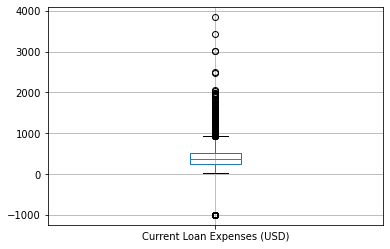

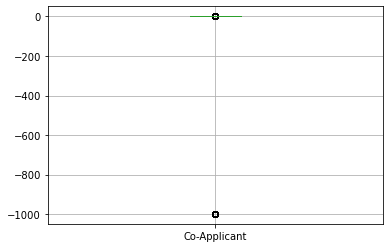

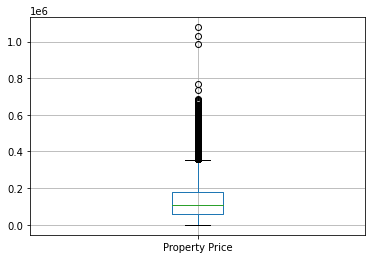

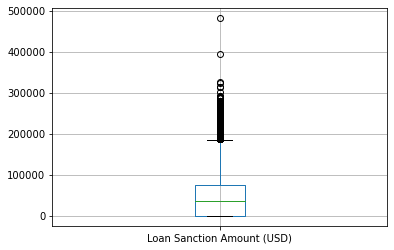

In [20]:
for column in cols_to_cap:
    plt.figure()
    train_df.boxplot([column])
    

In [21]:
capping_values=[76.46180,0,1.612579e+04,0.00000]

In [22]:
def cap_updater(org,val):
    if org < val :
        
        return val
    else:
        return org

In [23]:
train_df_cap=train_df

In [24]:
for i in  range(len(cols_to_cap)):
    train_df_cap[cols_to_cap[i]] = train_df_cap.apply(lambda x : cap_updater(x[cols_to_cap[i]],capping_values[i]),axis=1) 

In [25]:
train_df_cap.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,29660.000000,2.966000e+04,29660.000000,29660.000000,29660.000000,29660.000000,29660.000000,29660.000000,2.966000e+04,29660.000000,29660.000000,2.966000e+04,29660.000000
mean,40.099225,2.569101e+03,88792.057274,407.106002,2.232502,739.851590,0.194066,501.881827,2.565828e+03,2.460013,0.849697,1.319612e+05,47660.726632
std,16.050024,1.042751e+04,59480.995253,217.751789,0.914547,70.091376,0.395487,288.160738,1.042643e+04,1.118695,0.357375,9.311983e+04,48209.776265
min,18.000000,3.777000e+02,6048.240000,76.461800,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,0.000000,1.612579e+04,0.000000
25%,25.000000,1.742322e+03,41200.112500,248.717500,2.000000,685.317500,0.000000,251.000000,1.748915e+03,1.000000,1.000000,6.065874e+04,0.000000
50%,40.000000,2.222435e+03,75114.085000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,2.869822e+03,119890.857500,520.002500,3.000000,795.120000,0.000000,751.000000,2.850643e+03,3.000000,1.000000,1.788019e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


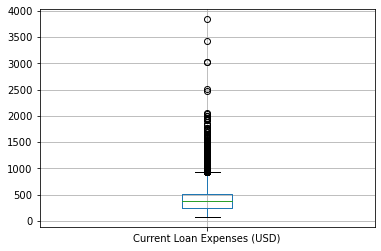

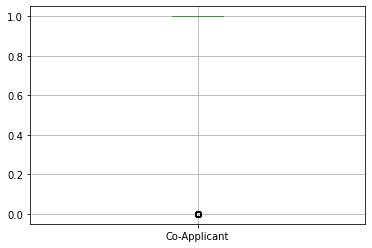

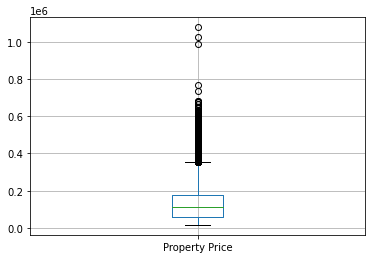

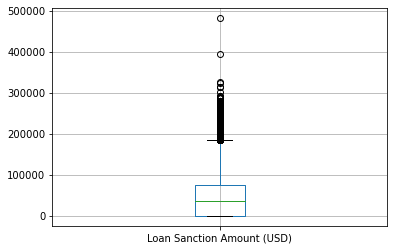

In [26]:
for column in cols_to_cap:
    plt.figure()
    train_df_cap.boxplot([column])
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Sales staff'),
  Text(1, 0, 'Laborers'),
  Text(2, 0, 'High skill tech staff'),
  Text(3, 0, 'Secretaries'),
  Text(4, 0, 'Managers'),
  Text(5, 0, 'Cooking staff'),
  Text(6, 0, 'Core staff'),
  Text(7, 0, 'Drivers'),
  Text(8, 0, 'Realty agents'),
  Text(9, 0, 'Security staff'),
  Text(10, 0, 'Accountants'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Medicine staff'),
  Text(14, 0, 'Cleaning staff'),
  Text(15, 0, 'Low-skill Laborers'),
  Text(16, 0, 'HR staff'),
  Text(17, 0, 'IT staff')])

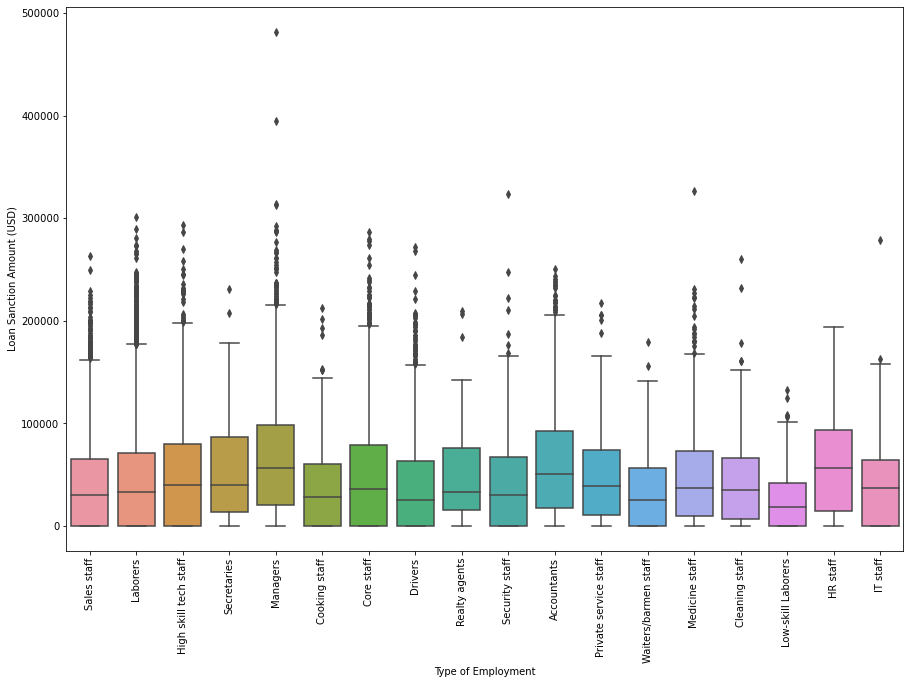

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train_df_cap,x='Type of Employment',y='Loan Sanction Amount (USD)')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Gender', ylabel='Loan Sanction Amount (USD)'>

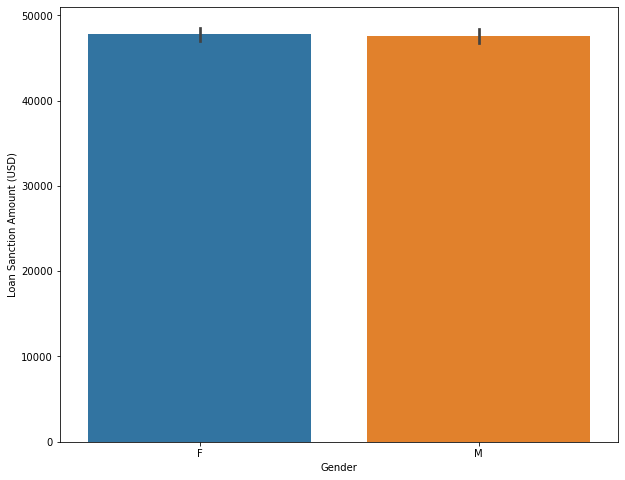

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Loan Sanction Amount (USD)',data=train_df_cap)

<AxesSubplot:xlabel='Age', ylabel='count'>

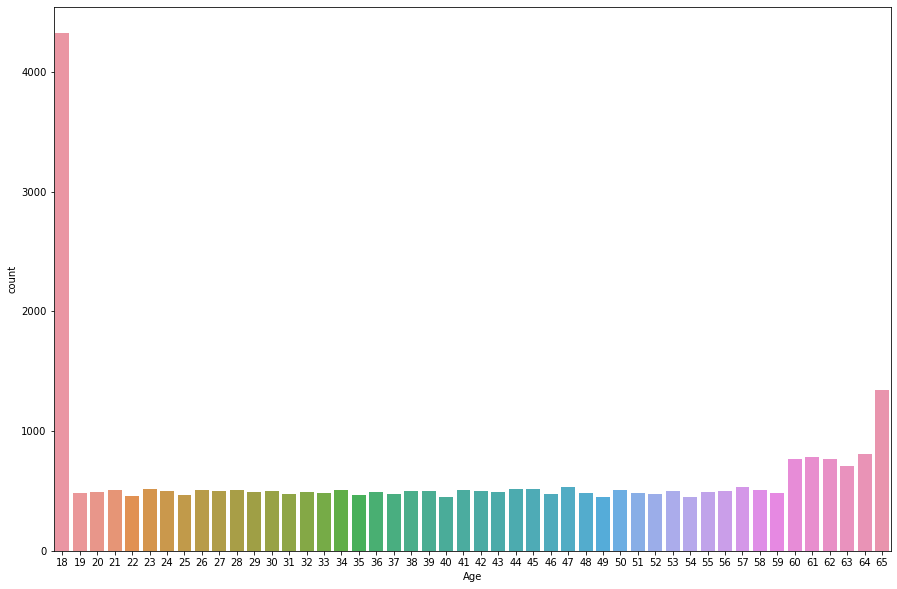

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x='Age',data=train_df_cap)

Text(0.5, 1.0, 'Loan Amount Request VS Loan Sanction Amount')

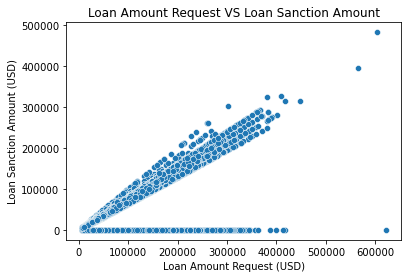

In [30]:
sns.scatterplot(x='Loan Amount Request (USD)',y='Loan Sanction Amount (USD)',data=train_df_cap)
plt.title('Loan Amount Request VS Loan Sanction Amount')

Text(0.5, 1.0, 'Income VS Loan Sanction Amount')

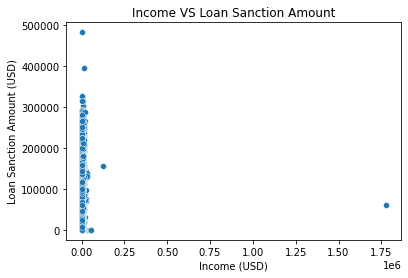

In [31]:
sns.scatterplot(x='Income (USD)',y='Loan Sanction Amount (USD)',data=train_df_cap)
plt.title('Income VS Loan Sanction Amount')

<AxesSubplot:xlabel='Current Loan Expenses (USD)', ylabel='Loan Sanction Amount (USD)'>

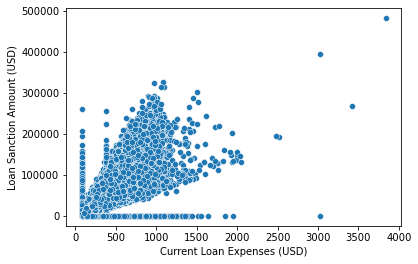

In [32]:
sns.scatterplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=train_df_cap)

<AxesSubplot:xlabel='Income Stability', ylabel='count'>

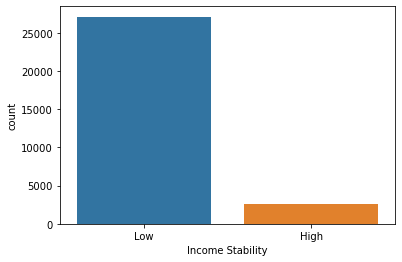

In [33]:
sns.countplot(x='Income Stability',data=train_df_cap)

<AxesSubplot:xlabel='Income Stability', ylabel='Loan Sanction Amount (USD)'>

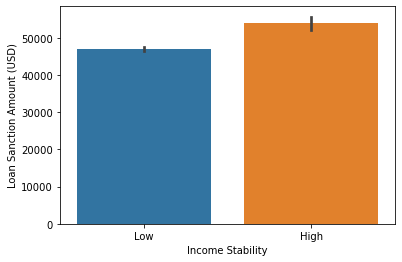

In [34]:
sns.barplot(x='Income Stability',y='Loan Sanction Amount (USD)',data=train_df_cap)

<AxesSubplot:xlabel='Gender', ylabel='Loan Sanction Amount (USD)'>

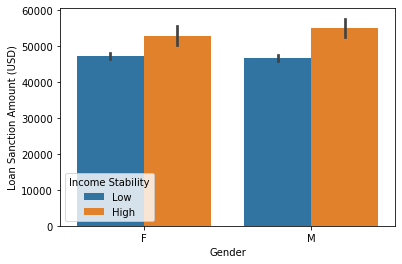

In [35]:
sns.barplot(x='Gender',y='Loan Sanction Amount (USD)',hue='Income Stability',data=train_df_cap)

<AxesSubplot:xlabel='Has Active Credit Card', ylabel='Loan Sanction Amount (USD)'>

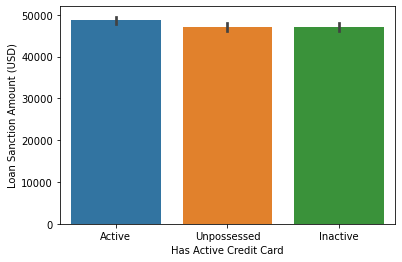

In [36]:
sns.barplot(x='Has Active Credit Card',y='Loan Sanction Amount (USD)',data=train_df_cap)

<AxesSubplot:xlabel='No. of Defaults', ylabel='Loan Sanction Amount (USD)'>

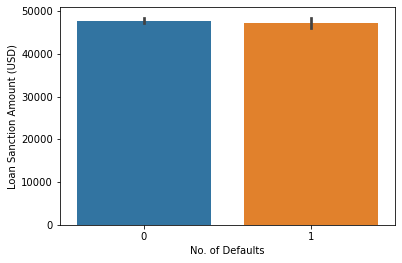

In [37]:
sns.barplot(x='No. of Defaults',y='Loan Sanction Amount (USD)',data=train_df_cap)

<AxesSubplot:xlabel='Property Price', ylabel='Loan Sanction Amount (USD)'>

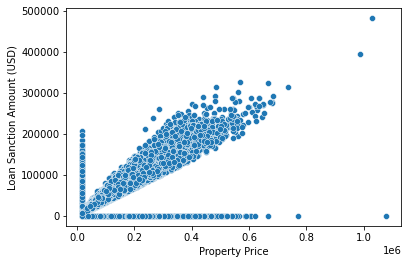

In [38]:
sns.scatterplot(x='Property Price',y='Loan Sanction Amount (USD)',data=train_df_cap)


C:\Users\Rasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


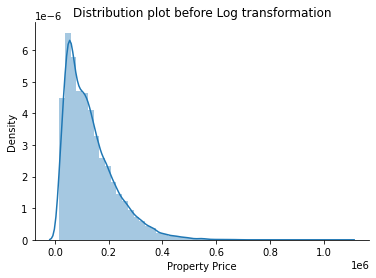

C:\Users\Rasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


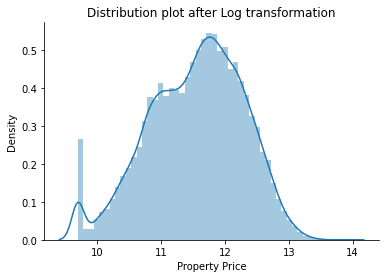

In [39]:

sns.distplot(train_df_cap['Property Price'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train_df_cap['Property Price'] = np.log(train_df_cap['Property Price'])
sns.distplot(train_df_cap['Property Price'])
plt.title("Distribution plot after Log transformation")
sns.despine()

C:\Users\Rasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


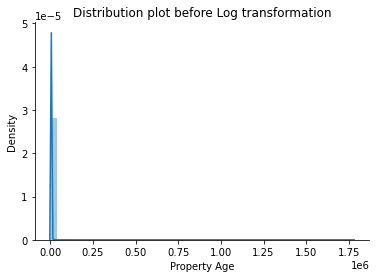

C:\Users\Rasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


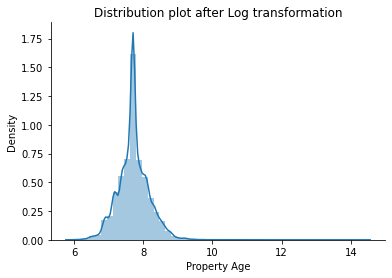

In [40]:
sns.distplot(train_df_cap['Property Age'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train_df_cap['Property Age'] = np.log(train_df_cap['Property Age'])
sns.distplot(train_df_cap['Property Age'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

C:\Users\Rasu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Co-Applicant', ylabel='Density'>

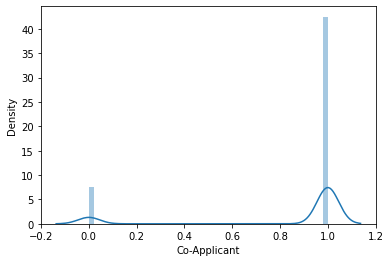

In [41]:
sns.distplot(train_df_cap['Co-Applicant'])

In [42]:
'''sns.distplot(train_df_cap['Current Loan Expenses (USD)'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train_df_cap['Current Loan Expenses (USD)'] = np.log(train_df_cap['Current Loan Expenses (USD)'])
sns.distplot(train_df_cap['Current Loan Expenses (USD)'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()'''

'sns.distplot(train_df_cap[\'Current Loan Expenses (USD)\'])\nplt.title("Distribution plot before Log transformation")\nsns.despine()\nplt.show()\ntrain_df_cap[\'Current Loan Expenses (USD)\'] = np.log(train_df_cap[\'Current Loan Expenses (USD)\'])\nsns.distplot(train_df_cap[\'Current Loan Expenses (USD)\'])\nplt.title("Distribution plot after Log transformation")\nsns.despine()\nplt.show()'

In [43]:
corr=train_df_cap.corr()

In [44]:
corr

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.009410,-0.010366,-0.026655,-0.079691,0.126956,0.003452,-0.012820,-0.051960,0.001463,-0.120401,-0.011325,0.008088
Income (USD),-0.009410,1.000000,0.045779,0.055454,0.004971,0.011610,-0.002039,-0.007456,0.208265,0.008906,0.003741,0.044582,0.033814
Loan Amount Request (USD),-0.010366,0.045779,1.000000,0.753579,0.039133,0.172443,-0.000114,-0.009390,0.372751,0.004043,0.021677,0.865665,0.726583
Current Loan Expenses (USD),-0.026655,0.055454,0.753579,1.000000,0.045985,0.118808,0.000079,-0.011542,0.431995,0.014627,0.026753,0.704392,0.539857
Dependents,-0.079691,0.004971,0.039133,0.045985,1.000000,-0.083324,0.007991,0.002433,-0.008503,-0.008972,0.041212,0.042339,0.004772
Credit Score,0.126956,0.011610,0.172443,0.118808,-0.083324,1.000000,0.006857,-0.006426,0.077201,0.008031,0.043163,0.149478,0.359774
No. of Defaults,0.003452,-0.002039,-0.000114,0.000079,0.007991,0.006857,1.000000,-0.001879,0.005872,0.000089,0.038919,0.001038,-0.004327
Property ID,-0.012820,-0.007456,-0.009390,-0.011542,0.002433,-0.006426,-0.001879,1.000000,-0.006823,0.008987,0.001772,-0.011488,-0.009763
Property Age,-0.051960,0.208265,0.372751,0.431995,-0.008503,0.077201,0.005872,-0.006823,1.000000,0.008238,0.028308,0.353614,0.259658
Property Type,0.001463,0.008906,0.004043,0.014627,-0.008972,0.008031,0.000089,0.008987,0.008238,1.000000,-0.004492,-0.000158,0.001986


<AxesSubplot:>

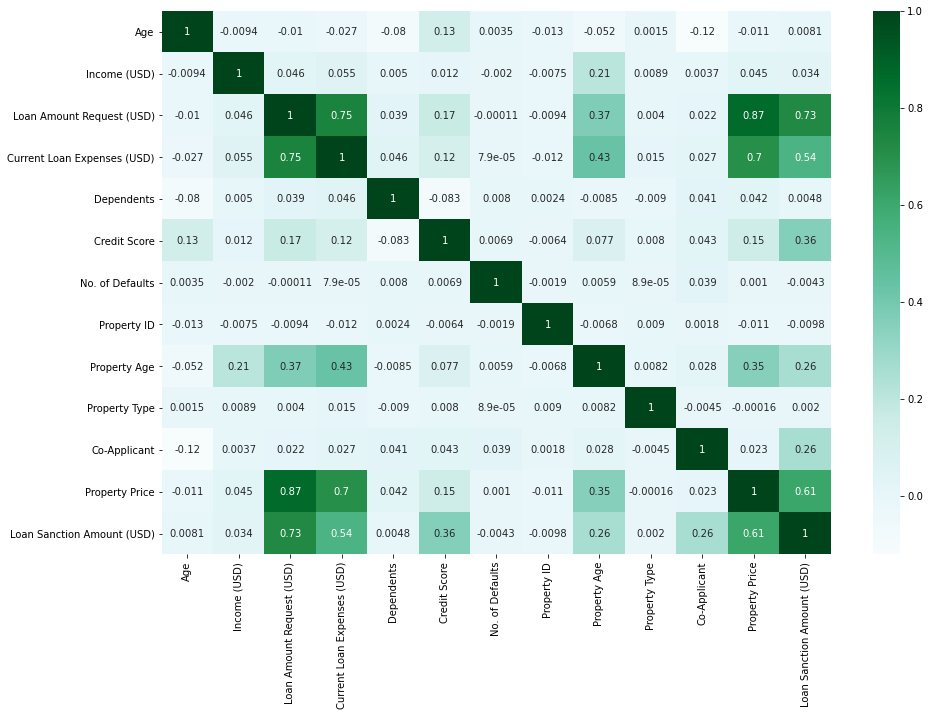

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='BuGn')

In [46]:
train_df_cap.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Active,746,7.566854,4,Rural,1,11.694692,54607.18
1,C-33999,America Calderone,M,32,4952.910,Low,Working,Laborers,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,8.507731,2,Rural,1,10.911281,37469.98
2,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,Laborers,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,6.895875,2,Urban,0,11.190522,36474.43
3,C-26480,Zoe Chitty,F,65,2222.435,High,Pensioner,Laborers,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,7.706725,2,Semi-Urban,1,11.707188,56040.54
4,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,715,7.868931,4,Semi-Urban,1,12.248020,74008.28


In [47]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"Credit Score",
"No. of Defaults",
"Property ID",
"Property Age",
"Property Type",
"Co-Applicant",
"Property Price",

]

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,7.487194,Age
1,1.096334,Income (USD)
2,3.399158,Loan Sanction Amount (USD)
3,7.989017,Current Loan Expenses (USD)
4,7.006131,Dependents
5,114.210821,Credit Score
6,1.243535,No. of Defaults
7,4.020957,Property ID
8,276.084172,Property Age
9,5.807108,Property Type


In [49]:
train_df.drop(['Property Price'],axis=1,inplace=True)

In [50]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"Credit Score",
"No. of Defaults",
"Property ID",
"Property Age",
"Property Type",
"Co-Applicant",


]

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,7.440522,Age
1,1.080299,Income (USD)
2,3.312094,Loan Sanction Amount (USD)
3,7.304080,Current Loan Expenses (USD)
4,6.865231,Dependents
5,103.046201,Credit Score
6,1.243435,No. of Defaults
7,4.009658,Property ID
8,122.289804,Property Age
9,5.790014,Property Type


In [52]:
train_df.drop(['Property Age'],axis=1,inplace=True)

In [53]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"No. of Defaults",
"Property ID",
"Credit Score",
"Property Type",
"Co-Applicant",


]

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,7.382770,Age
1,1.064158,Income (USD)
2,3.005406,Loan Sanction Amount (USD)
3,6.218934,Current Loan Expenses (USD)
4,6.585851,Dependents
5,1.243022,No. of Defaults
6,3.954326,Property ID
7,27.628004,Credit Score
8,5.680172,Property Type
9,6.940701,Co-Applicant


In [55]:
train_df.drop(['Credit Score'],axis=1,inplace=True)

In [56]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"No. of Defaults",
"Property ID",
"Property Type",
"Co-Applicant",


]

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,5.278155,Age
1,1.063431,Income (USD)
2,2.998854,Loan Sanction Amount (USD)
3,5.810153,Current Loan Expenses (USD)
4,5.729905,Dependents
5,1.238645,No. of Defaults
6,3.652605,Property ID
7,4.997591,Property Type
8,5.787145,Co-Applicant


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
lr=LabelEncoder()

In [60]:
train_df_cap['Gender']=lr.fit_transform(train_df_cap['Gender'])
train_df_cap['Income Stability']=lr.fit_transform(train_df_cap['Income Stability'])
train_df_cap['Profession']=lr.fit_transform(train_df_cap['Profession'])
train_df_cap['Type of Employment']=lr.fit_transform(train_df_cap['Type of Employment'])
train_df_cap['Location']=lr.fit_transform(train_df_cap['Location'])
train_df_cap['Expense Type 1']=lr.fit_transform(train_df_cap['Expense Type 1'])
train_df_cap['Expense Type 2']=lr.fit_transform(train_df_cap['Expense Type 2'])
train_df_cap['Has Active Credit Card']=lr.fit_transform(train_df_cap['Has Active Credit Card'])
train_df_cap['Property Location']=lr.fit_transform(train_df_cap['Property Location'])

In [61]:
train_df_cap.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,0,56,1933.050,1,7,14,1,72809.58,241.08,0,0,3.0,0,0,746,4,0,1,54607.18
1,C-33999,America Calderone,1,32,4952.910,1,7,8,1,46837.47,495.81,0,1,1.0,0,2,608,2,0,1,37469.98
2,C-3770,Rosetta Verne,0,65,988.190,0,3,8,1,45593.04,171.95,0,1,1.0,0,2,546,2,2,0,36474.43
3,C-26480,Zoe Chitty,0,65,2222.435,0,3,8,0,80057.92,298.54,0,1,2.0,1,2,890,2,1,1,56040.54
4,C-23459,Afton Venema,0,31,2614.770,1,7,6,1,113858.89,491.41,0,1,2.0,1,0,715,4,1,1,74008.28


In [62]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"No. of Defaults",
"Property ID",
"Property Type",
"Co-Applicant",
"Income Stability",
"Profession",
"Type of Employment",
"Location",
"Expense Type 1",
"Expense Type 2",
"Has Active Credit Card"


]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,6.060653,Age
1,1.064655,Income (USD)
2,3.130838,Loan Sanction Amount (USD)
3,6.529492,Current Loan Expenses (USD)
4,6.818252,Dependents
5,1.240002,No. of Defaults
6,3.826625,Property ID
7,5.375383,Property Type
8,7.490701,Co-Applicant
9,12.642096,Income Stability


In [64]:
train_df_cap.drop(['Income Stability'],axis=1,inplace=True)

In [65]:
vif_cols = [
"Age",
"Income (USD)",
"Loan Sanction Amount (USD)",
"Current Loan Expenses (USD)",
"Dependents",
"No. of Defaults",
"Property ID",
"Property Type",
"Co-Applicant",

"Profession",
"Type of Employment",
"Location",
"Expense Type 1",
"Expense Type 2",
"Has Active Credit Card"


]

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train_df_cap[vif_cols].values,i)
for i in range(train_df_cap[vif_cols].shape[1])]
vif['Features'] = vif_cols
vif 

,VIF,Features
0,5.834808,Age
1,1.064413,Income (USD)
2,3.049174,Loan Sanction Amount (USD)
3,6.230633,Current Loan Expenses (USD)
4,6.321184,Dependents
5,1.239797,No. of Defaults
6,3.777918,Property ID
7,5.254772,Property Type
8,6.428314,Co-Applicant
9,4.082830,Profession


In [67]:
corr_all=train_df_cap.corr()

In [68]:
corr_all

,Gender,Age,Income (USD),Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Loan Sanction Amount (USD)
Gender,1.000000,0.004216,0.005490,-0.002713,-0.004209,0.002552,0.000269,-0.007057,-0.001028,0.003329,-0.006197,0.000557,0.009003,-0.003008,0.003284,-0.003449,0.005063,-0.002348
Age,0.004216,1.000000,-0.009410,-0.093523,-0.001283,-0.016955,-0.010366,-0.026655,-0.045093,0.029883,-0.079691,0.003452,0.008116,-0.012820,0.001463,0.003819,-0.120401,0.008088
Income (USD),0.005490,-0.009410,1.000000,-0.012347,-0.001535,0.026082,0.045779,0.055454,0.018989,0.004682,0.004971,-0.002039,-0.001840,-0.007456,0.008906,-0.000045,0.003741,0.033814
Profession,-0.002713,-0.093523,-0.012347,1.000000,0.002766,-0.144283,-0.084859,-0.088262,0.005278,-0.013920,0.065656,0.005931,0.019923,-0.000197,0.003238,-0.008409,0.044831,-0.092897
Type of Employment,-0.004209,-0.001283,-0.001535,0.002766,1.000000,-0.013358,-0.031309,-0.015904,-0.034150,0.009582,-0.023497,-0.005113,0.000543,0.007503,-0.014549,-0.001663,0.008039,-0.030384
Location,0.002552,-0.016955,0.026082,-0.144283,-0.013358,1.000000,0.104263,0.130129,0.022073,0.003576,-0.030019,-0.011813,-0.015041,0.001561,-0.003395,-0.001026,0.009483,0.101329
Loan Amount Request (USD),0.000269,-0.010366,0.045779,-0.084859,-0.031309,0.104263,1.000000,0.753579,0.096446,-0.023976,0.039133,-0.000114,-0.026150,-0.009390,0.004043,0.006047,0.021677,0.726583
Current Loan Expenses (USD),-0.007057,-0.026655,0.055454,-0.088262,-0.015904,0.130129,0.753579,1.000000,0.124583,0.010592,0.045985,0.000079,-0.005794,-0.011542,0.014627,0.002481,0.026753,0.539857
Expense Type 1,-0.001028,-0.045093,0.018989,0.005278,-0.034150,0.022073,0.096446,0.124583,1.000000,0.025212,0.107516,0.006421,-0.009378,-0.000230,0.009663,0.000172,0.017816,0.055460
Expense Type 2,0.003329,0.029883,0.004682,-0.013920,0.009582,0.003576,-0.023976,0.010592,0.025212,1.000000,0.035182,0.001376,0.030273,-0.003087,0.006114,-0.017302,-0.001929,0.008727


<AxesSubplot:>

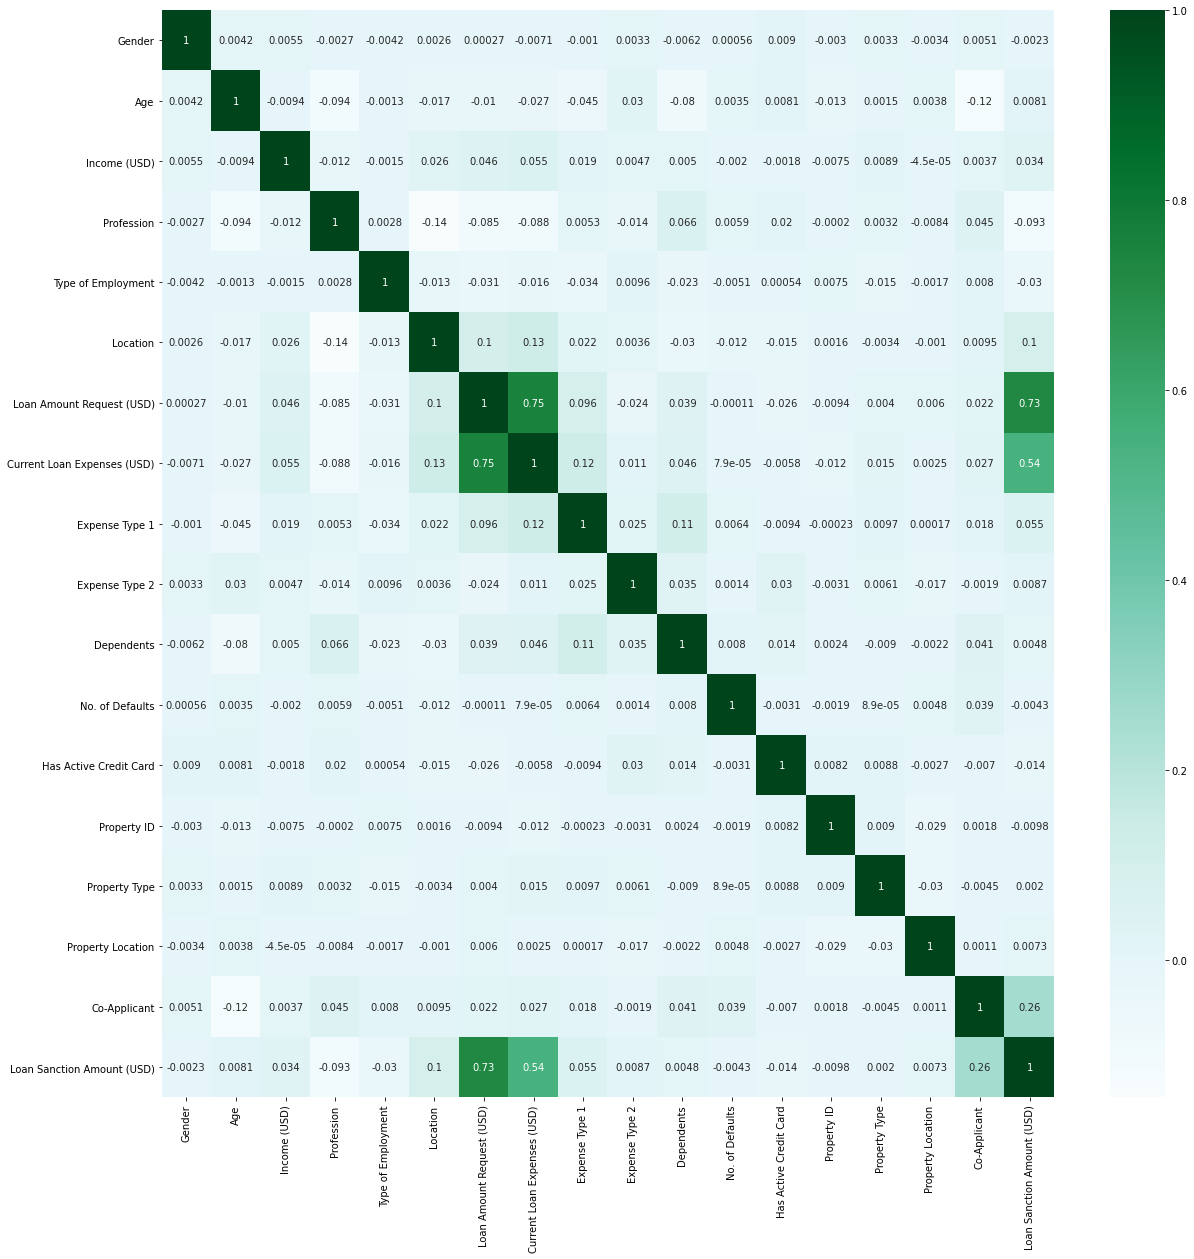

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_all,annot=True,cmap='BuGn')

In [70]:

train_df_cap.drop(['Customer ID','Name']
              ,axis=1,inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X=train_df_cap.drop(['Loan Sanction Amount (USD)'],axis=1)
y=train_df_cap['Loan Sanction Amount (USD)']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23728, 17), (5932, 17), (23728,), (5932,))

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model_lr=LinearRegression()

In [77]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [78]:
predict=model_lr.predict(X_test)
predict

array([ 46845.17039695,  49062.67604247,   5044.43964312, ...,
       187972.31354196,  71823.38092757, 132870.56986136])

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [80]:
model_lr.score(X_test,y_test)

0.5627493089366036

In [81]:
print("Mean absolute Error:",mean_absolute_error(y_test,predict))
print("Mean Squared Errorr",mean_squared_error(y_test,predict))
print("R2_score",r2_score(y_test,predict))


Mean absolute Error: 20593.537994828675
Mean Squared Errorr 991991508.7712013
R2_score 0.5627493089366036


In [82]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(X_train,y_train)


RandomForestRegressor()

In [83]:
predict3=model_rf.predict(X_test)

In [84]:
print("Mean Absolute Error:",mean_absolute_error(y_test,predict3))
print("Mean Squared Error:",mean_squared_error(y_test,predict3))
print("R2 Score:",r2_score(y_test,predict3))


Mean Absolute Error: 18409.328617279163
Mean Squared Error: 873055231.3224765
R2 Score: 0.6151741220999565


In [85]:
model_rf.score(X_test,y_test)

0.6151741220999565

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
model_gbr=GradientBoostingRegressor(n_estimators=100,max_depth=6)
model_gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=6)

In [88]:
model_gbr.score(X_test,y_test)

0.6256278382416915

In [89]:
predict4=model_gbr.predict(X_test)

In [90]:
print("Mean Absolute Error:",mean_absolute_error(y_test,predict4))
print("Mean Squared Error:",mean_squared_error(y_test,predict4))
print("R2 Score:",r2_score(y_test,predict4))

Mean Absolute Error: 17661.601173412615
Mean Squared Error: 849338864.8085994
R2 Score: 0.6256278382416915


In [91]:
predict4

array([ 44169.33199591,  44510.53053999,   9299.77414767, ...,
       199727.82699863,  82484.4769919 , 141954.75555645])

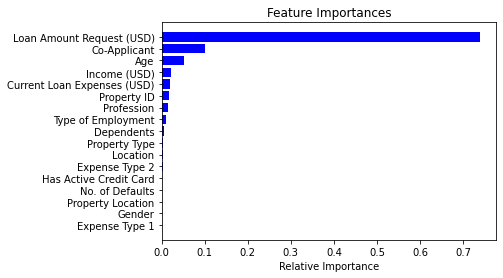

In [92]:
features = X_train.columns
importances = model_gbr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [93]:
test_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [94]:
test_df['Co-Applicant']=test_df['Co-Applicant'].replace('?',0)
test_df['Co-Applicant']=test_df['Co-Applicant'].astype(int)

In [95]:

test_df['Property Price']=test_df['Property Price'].replace('?',np.nan)
test_df['Property Price']=test_df['Property Price'].astype(float)

In [96]:
test_df.isnull().sum().sort_values(ascending=False)

Type of Employment             4689
Dependents                     1142
Has Active Credit Card         1076
Property Age                    892
Income Stability                813
Income (USD)                    750
Credit Score                    743
Property Price                  168
Property Location               160
Current Loan Expenses (USD)      83
Gender                           31
Name                              0
Age                               0
Profession                        0
Expense Type 1                    0
Location                          0
Loan Amount Request (USD)         0
Co-Applicant                      0
Expense Type 2                    0
No. of Defaults                   0
Property ID                       0
Property Type                     0
Customer ID                       0
dtype: int64

In [97]:
(test_df.isnull().sum().sort_values(ascending=False)/len(test_df))*100

Type of Employment             23.445
Dependents                      5.710
Has Active Credit Card          5.380
Property Age                    4.460
Income Stability                4.065
Income (USD)                    3.750
Credit Score                    3.715
Property Price                  0.840
Property Location               0.800
Current Loan Expenses (USD)     0.415
Gender                          0.155
Name                            0.000
Age                             0.000
Profession                      0.000
Expense Type 1                  0.000
Location                        0.000
Loan Amount Request (USD)       0.000
Co-Applicant                    0.000
Expense Type 2                  0.000
No. of Defaults                 0.000
Property ID                     0.000
Property Type                   0.000
Customer ID                     0.000
dtype: float64

In [98]:
test_df['Type of Employment']=test_df['Type of Employment'].fillna(test_df['Type of Employment'].mode()[0])
test_df['Property Age']=test_df['Property Age'].fillna(test_df['Property Age'].median())
test_df['Income (USD)']=test_df['Income (USD)'].fillna(test_df['Income (USD)'].median())
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].median())
test_df['Credit Score']=test_df['Credit Score'].fillna(test_df['Credit Score'].median())
test_df['Income Stability']=test_df['Income Stability'].fillna(test_df['Income Stability'].mode()[0])
test_df['Has Active Credit Card']=test_df['Has Active Credit Card'].fillna(test_df['Has Active Credit Card'].mode()[0])
test_df['Property Location']=test_df['Property Location'].fillna(test_df['Property Location'].mode()[0])
test_df['Property Price']=test_df['Property Price'].fillna(test_df['Property Price'].median())
test_df['Current Loan Expenses (USD)']=test_df['Current Loan Expenses (USD)'].fillna(test_df['Current Loan Expenses (USD)'].median())
test_df['Gender']=test_df['Gender'].fillna(test_df['Gender'].mode()[0])

In [99]:
test_df.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
lr=LabelEncoder()

In [102]:
test_df['Gender']=lr.fit_transform(test_df['Gender'])
test_df['Income Stability']=lr.fit_transform(test_df['Income Stability'])
test_df['Profession']=lr.fit_transform(test_df['Profession'])
test_df['Type of Employment']=lr.fit_transform(test_df['Type of Employment'])
test_df['Location']=lr.fit_transform(test_df['Location'])
test_df['Expense Type 1']=lr.fit_transform(test_df['Expense Type 1'])
test_df['Expense Type 2']=lr.fit_transform(test_df['Expense Type 2'])
test_df['Has Active Credit Card']=lr.fit_transform(test_df['Has Active Credit Card'])
test_df['Property Location']=lr.fit_transform(test_df['Property Location'])

In [103]:
test_df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,0,47,3472.69,1,0,10,1,137088.98,396.72,0,0,2.0,799.14,0,2,843,3472.69,2,2,1,236644.50
1,C-35067,Jeannette Cha,0,57,1184.84,1,6,14,0,104771.59,463.76,1,1,2.0,833.31,0,2,22,1184.84,1,0,1,142357.30
2,C-34590,Keva Godfrey,0,52,1266.27,1,6,8,1,176684.91,493.15,0,1,3.0,627.44,0,2,1,1266.27,1,2,1,300991.24
3,C-16668,Elva Sackett,1,65,1369.72,0,2,8,0,97009.18,446.15,0,1,2.0,833.20,0,1,730,1369.72,1,1,0,125612.10
4,C-12196,Sade Constable,0,60,1939.23,0,2,8,2,109980.00,370.10,0,0,2.0,739.30,0,0,356,1939.23,4,1,1,180908.00


In [104]:
test_df.drop(['Name','Income Stability','Credit Score','Property Age','Property Price']
              ,axis=1,inplace=True)

In [107]:
test=test_df.drop('Customer ID',axis=1).copy()

In [108]:
prediction=model_gbr.predict(test)

In [109]:
output = pd.DataFrame({'Customer ID': test_df['Customer ID'], 'Loan Sanction Amount (USD)': prediction})
output.to_csv('my_submission.csv', index=False)
